### sklearn.model_selection

- 데이터 분할
- 교차 검증

### 1. 학습/테스트 데이터 세트 분할 (`train_test_split()`)
- train_test_split()의 반환값은 튜플 형태임.

  1) 학습 데이터의 피처 데이터 세트

  2) 테스트 데이터의 피처 데이터 세트

  3) 학습 데이터의 레이블 데이터 세트

  4) 테스트 데이터의 레이블 데이터 세트

  위 네 가지 값을 반환함.

- test_size
  - 전체 데이터에서 테스트 데이터 세트 크기 결정. 예) 0.2
  
- shuffle
  - 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만듦. 디폴트는 True.

- random_state
  - 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.3,
                                                    random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


### 2. 교차 검증

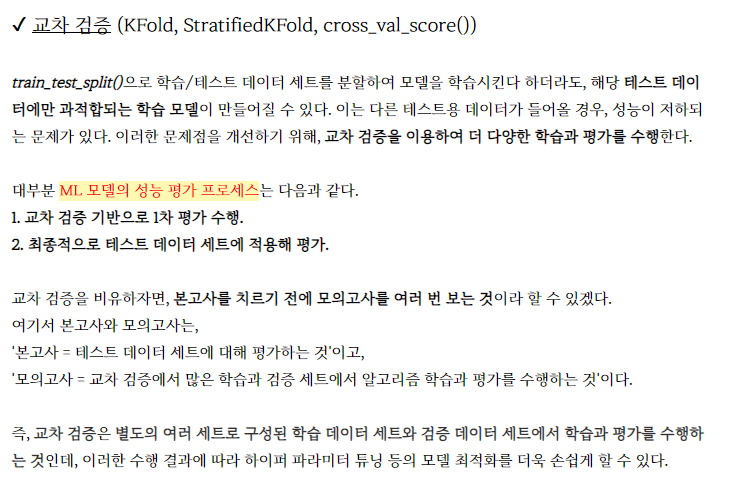

### 2-1. 교차 검증 (`KFold`)

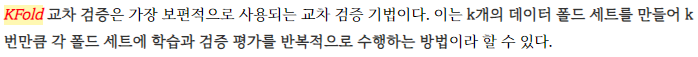

In [ ]:
## KFold 객체 생성.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

## 5개의 폴드 세트로 분리하는 'kFold 객체'와 '폴드 세트별 정확도를 담을 리스트 객체' 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [ ]:
## KFold 객체를 생성한 이후, KFold 객체의 split()을 호출하여 전체 붓꽃 데이터를 5개의 폴드 데이터로 분리함.
n_iter = 0

for train_index, test_index in kfold.split(features):

  # kfold.split()으로 반환된 인덱스를 사용하여 학습/검증 데이터 추출.
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측.
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  # 반복 시마다 정확도 측정.
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('{0} 교차 검증 정확도: {1} / 학습 데이터의 크기: {2} / 검증 데이터의 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index)); print()
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산.
print('평균 검증 정확도:', np.mean(cv_accuracy))

1 교차 검증 정확도: 1.0 / 학습 데이터의 크기: 120 / 검증 데이터의 크기: 30
1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도: 0.9667 / 학습 데이터의 크기: 120 / 검증 데이터의 크기: 30
2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도: 0.8667 / 학습 데이터의 크기: 120 / 검증 데이터의 크기: 30
3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도: 0.9333 / 학습 데이터의 크기: 120 / 검증 데이터의 크기: 30
4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도: 0.7333 / 학습 데이터의 크기: 120 / 검증 데이터의 크기: 30
5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도: 0.9


### 2-2. 교차 검증 (`StratifiedKFold`)

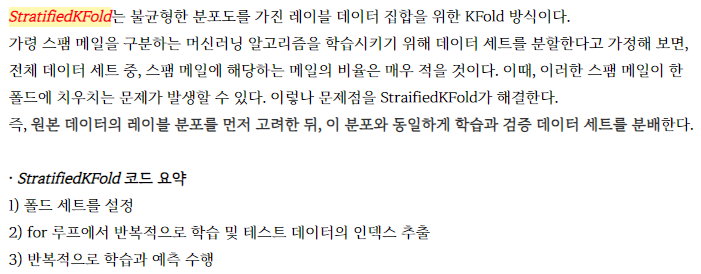

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts() ## 붓꽃 데이터 세트 클래스별 개수 확인.

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
## 학습/검증 데이터 분포 확인.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):

  n_iter += 1

  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]

  print('## 교차 검증 {0}'.format(n_iter), '\n')
  print('학습 레이블 데이터 분포:\n', label_train.value_counts(), '\n')
  print('검증 레이블 데이터 분포:\n', label_test.value_counts(), '\n')

## 교차 검증 1 

학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64 

## 교차 검증 2 

학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64 

## 교차 검증 3 

학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64 

검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64 



In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

## StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요함.
for train_index, test_index in skfold.split(features, label):

  # StratifiedKFold.split()으로 반환된 인덱스를 사용하여 학습/검증 데이터 추출.
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측.
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  # 반복 시마다 정확도 측정.
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('{0} 교차 검증 정확도: {1} / 학습 데이터의 크기: {2} / 검증 데이터의 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index)); print()
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 출력.
print(cv_accuracy)
# 개별 iteration별 정확도를 합하여 평균 정확도 계산.
print('평균 검증 정확도:', np.mean(cv_accuracy))

1 교차 검증 정확도: 0.98 / 학습 데이터의 크기: 100 / 검증 데이터의 크기: 50
1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도: 0.94 / 학습 데이터의 크기: 100 / 검증 데이터의 크기: 50
2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도: 0.98 / 학습 데이터의 크기: 100 / 검증 데이터의 크기: 50
3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

[0.98, 0.94, 0.98]
평균 검증 정확도: 0.9666666666666667


### 2-3. 교차 검증 API (`cross_val_score()`)

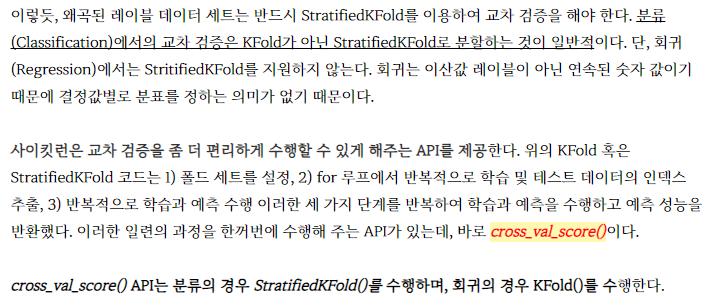

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris.data
label = iris.target

## 성능 지표는 accuracy, 교차 검증 세트는 3개.
## 아래 다섯 가지가 주요 cross_val_score()의 주요 파라미터임.
## cross_val_score()은 평가 결과를 배열로 반환함!
scores = cross_val_score(
    dt_clf, # 분류 모델.
    data,   # 피처 데이터 세트.
    label,  # 레이블 데이터 세트.
    scoring='accuracy',  # 예측 성능 평가 지표.
    cv=3    # 교차 검증 폴드 수.
)

print('교차 검증별 정확도:', np.round(scores, 4)) # 결과를 배열로 반환.
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667
